In [14]:
from ananke.configurations.collection import HDF5StorageConfiguration
from ananke.visualisation.event import draw_hit_histogram, draw_hit_distribution
from ananke.visualisation.detector import get_detector_scatter3ds
from olympus.configuration.generators import EventGeneratorConfiguration
from olympus.configuration.generators import GenerationConfiguration
from olympus.event_generation.medium import MediumEstimationVariant
from olympus.configuration.generators import UniformSpectrumConfiguration
from ananke.models.collection import Collection
from ananke.schemas.event import EventType
from olympus.configuration.photon_propagation import MockPhotonPropagatorConfiguration

from olympus.configuration.generators import DatasetConfiguration

#from ananke.configurations.presets.detector import single_line_configuration
from olympus.event_generation.generators import generate
from ananke import defaults
from ananke.configurations.detector import DetectorConfiguration
import matplotlib.pyplot as plt

In [39]:
modules_per_line = 20
distance_between_modules = 50.0  # m
dark_noise_rate = 16 * 1e-5  # 1/ns
module_radius = 0.21  # m
pmt_efficiency = 0.42  # by Christian S.
pmt_area_radius = 75e-3 / 2.0  # m

detector = DetectorConfiguration.parse_obj(
    {
        "string": {
            "module_number": modules_per_line,
            "module_distance": distance_between_modules,
        },
        "pmt": {
            "efficiency": pmt_efficiency,
            "noise_rate": dark_noise_rate,
            "area": pmt_area_radius,
        },
        "module": {"radius": module_radius},
        "geometry": {
            "type": "single",
        },
        "geometry":{
            "type":"rhombus",
            #"number_of_strings_per_side":3,
            "side_length":80,
            
        },
        "seed": defaults.seed,
    }
)
print(detector)

geometry=LengthGeometryConfiguration(start_position=Position(x=0.0, y=0.0), type=<DetectorGeometries.RHOMBUS: 'rhombus'>, side_length=80) string=StringConfiguration(z_offset=0.0, module_number=20, module_distance=50.0) module=ModuleConfiguration(radius=0.21, module_as_PMT=False) pmt=PMTConfiguration(efficiency=0.42, area=0.0375, noise_rate=0.00016, gamma_scale=0.0) seed=32118


In [40]:
photon_propagator_configuration = MockPhotonPropagatorConfiguration(
    resolution=18000,
    medium=MediumEstimationVariant.PONE_OPTIMISTIC
)

In [41]:
configuration = DatasetConfiguration(
    detector=detector,
    generators=[
        GenerationConfiguration(
            generator=EventGeneratorConfiguration(
                type=EventType.CASCADE,
                spectrum=UniformSpectrumConfiguration(
                    log_minimal_energy=2.0,
                    log_maximal_energy=2.0
                ),
                source_propagator=photon_propagator_configuration
            ),
            number_of_samples=1,
            #drop_empty_records=False
        )
    ],
    storage=HDF5StorageConfiguration(data_path= "data/rho.h5",read_only=False)
)

collection = generate(configuration)

100%|██████████| 1/1 [00:03<00:00,  3.59s/it]


In [42]:
collection.open()
detector=collection.storage.get_detector()
collection.close()

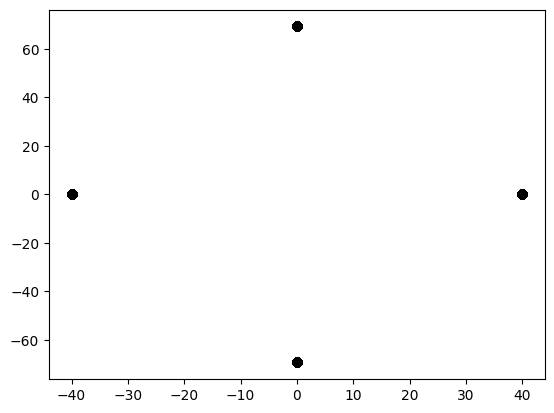

In [43]:
x=detector.df['module_location_x']
y=detector.df['module_location_y']
plt.scatter(x,y, c='black')
plt.show()

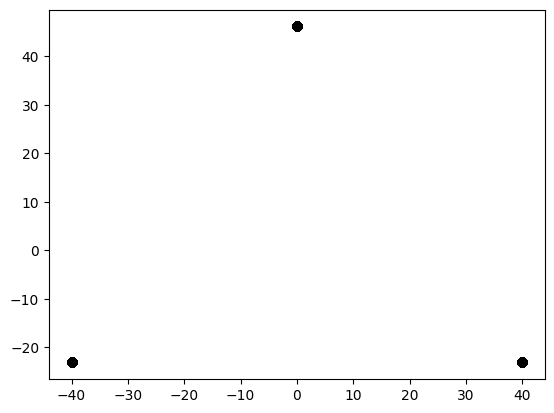

In [37]:
x=detector.df['module_location_x']
y=detector.df['module_location_y']
plt.scatter(x,y, c='black')
plt.show()

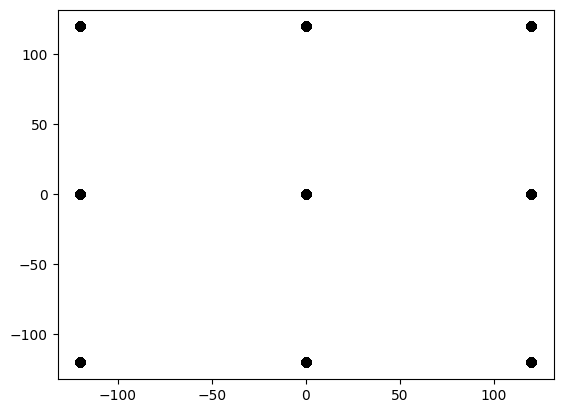

In [26]:
x=detector.df['module_location_x']
y=detector.df['module_location_y']
plt.scatter(x,y, c='black')
plt.show()

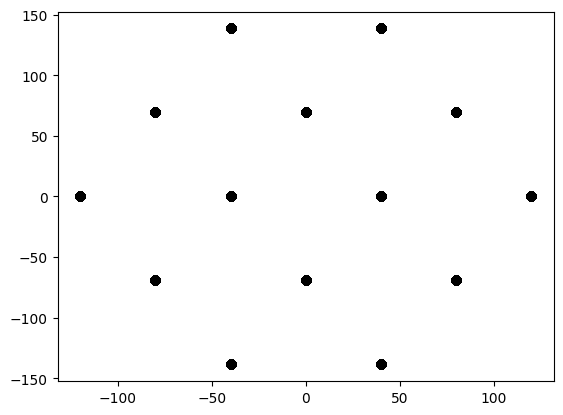

In [21]:
x=detector.df['module_location_x']
y=detector.df['module_location_y']
plt.scatter(x,y, c='black')
plt.show()

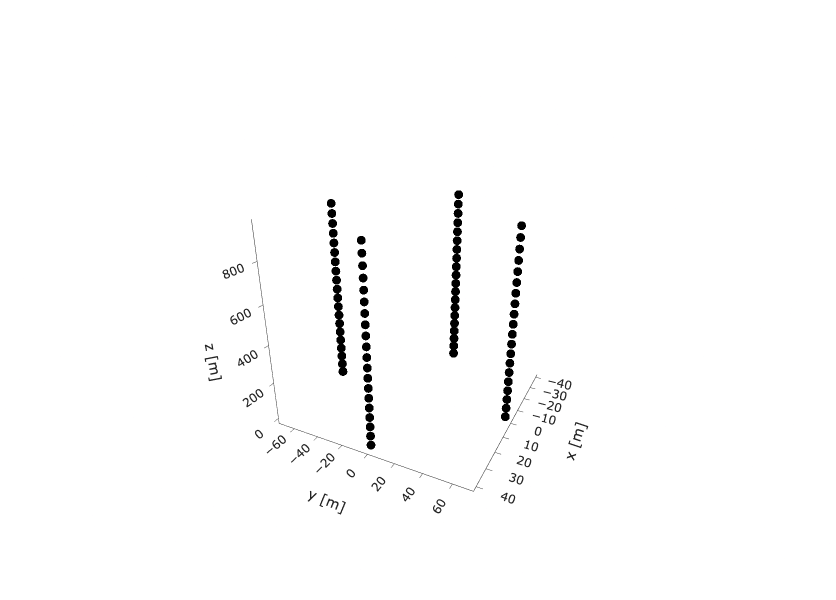

In [44]:
get_detector_scatter3ds(detector)

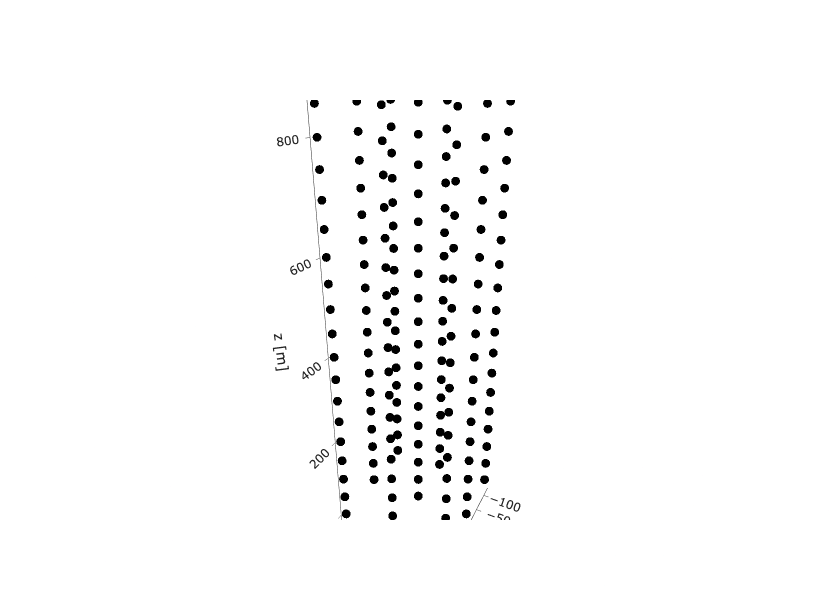

In [27]:
get_detector_scatter3ds(detector)

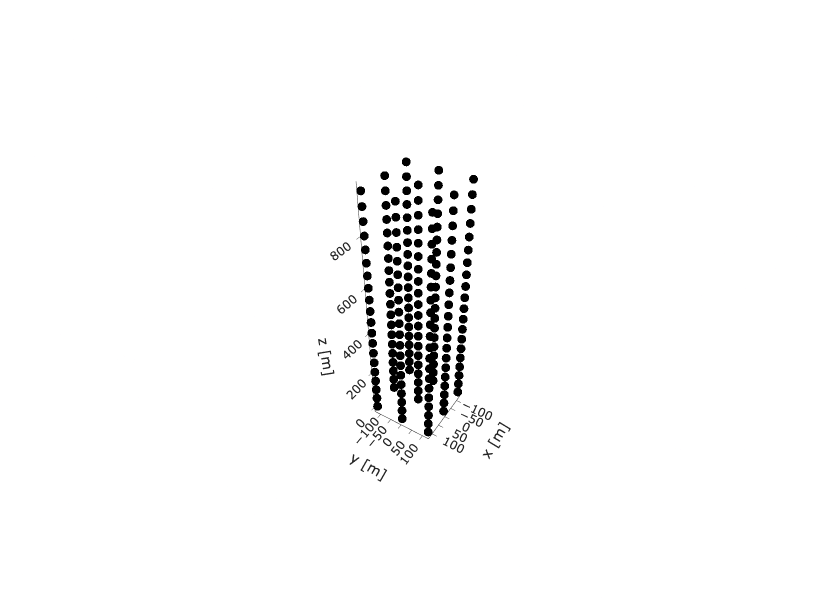

In [27]:
get_detector_scatter3ds(detector)

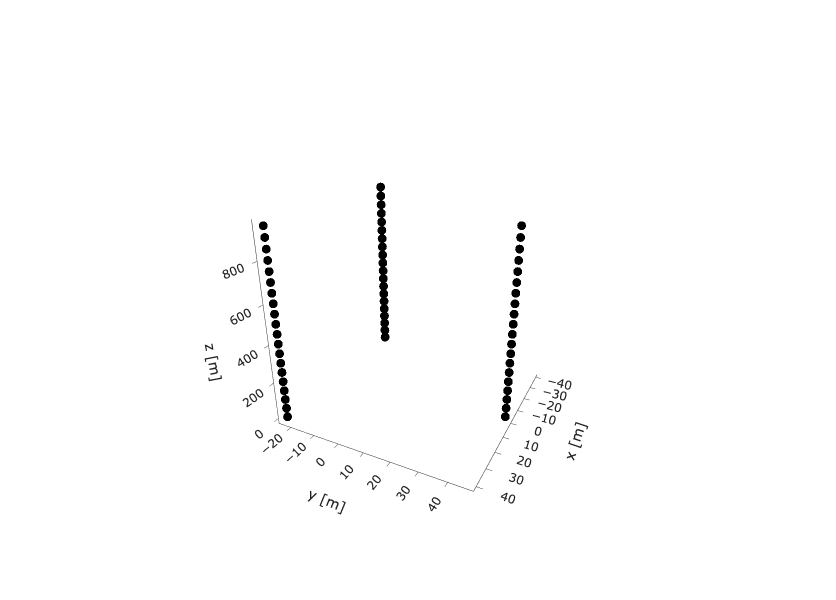

In [38]:
get_detector_scatter3ds(detector)

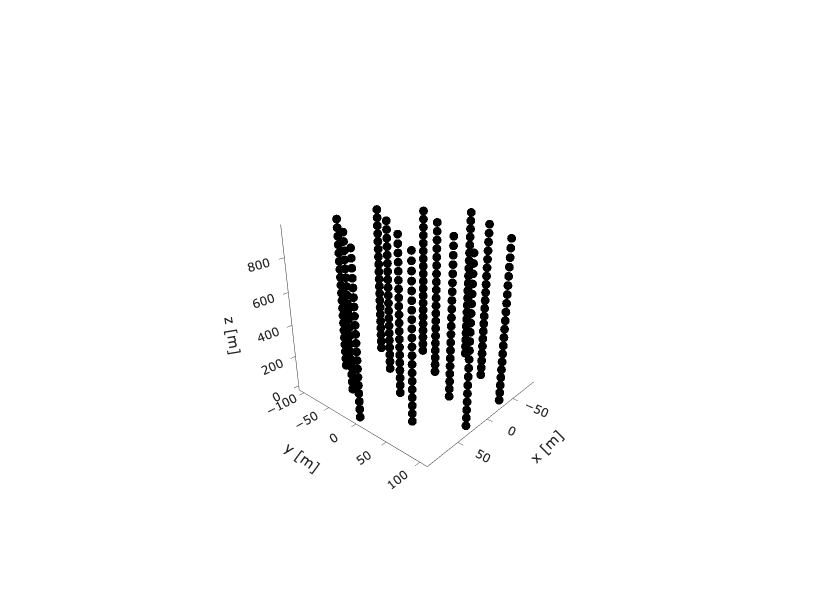

In [32]:
get_detector_scatter3ds(detector)

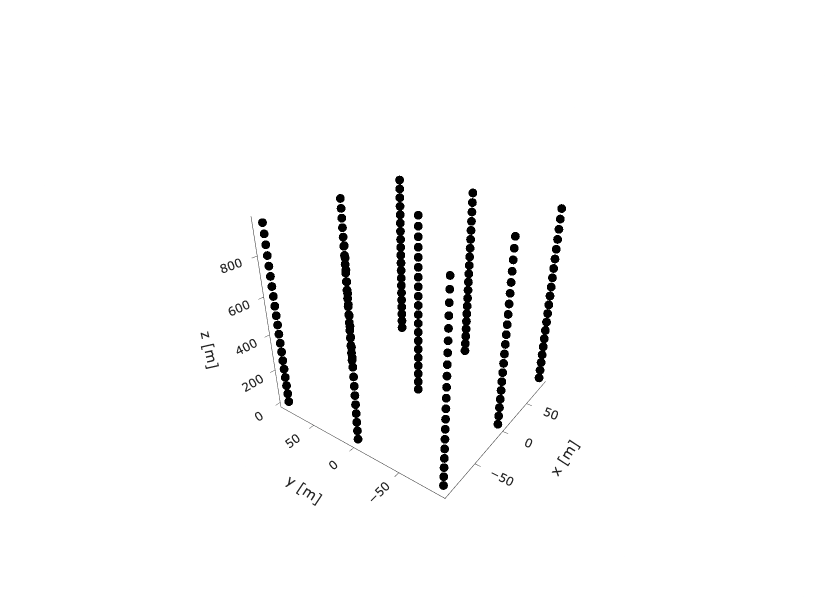

In [26]:
get_detector_scatter3ds(detector)